In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

In [305]:
X,y = make_regression(n_features = 2,n_samples = 500,random_state = 41)

In [310]:
def JPRidge(X,y,penalty = 2,alpha = 6000,max_iter = 500,tol = 1e-2):
    y = y.reshape([len(y),1])
    ones = np.ones(shape = [len(X),1])
    X_ones = np.concatenate([ones,X],axis = 1)
    beta = np.zeros(shape = [X_ones.shape[1],1])
    loss_ls = []
    iter_ls = []
    loss_change = []
    for i in range(0,max_iter):
        er = y-X_ones@beta
        old_loss = (1/len(X)) *er.T@er + penalty*beta.T@beta
        grad = 1/(X_ones.T@(X_ones@beta-y) + 2*penalty*beta
        beta = beta - grad
        loss = (1/len(X)) *er.T@er + penalty*beta.T@beta
        loss_ls.append(loss)
        iter_ls.append(i)
        
        change = np.max(np.abs(grad))
        print(change)
    return loss_ls,iter_ls,beta
    
loss, iter_,beta = JPRidge(X,y)

49632.12829583526
45231.54515478856
43894.848748149474
43116.55199334639
42570.491007841134
42151.16027909043
41811.453826479905
41526.32841254659
41280.90623470881
41065.63813273546
40874.035064879405
40701.48941869071
40544.61334261791
40400.84409337608
40268.19684790315
40145.103508881344
40030.303969854074
39922.77062267043
39821.65462561249
39726.246822503956
39635.94877147205
39550.25090256214
39468.71580004716
39390.965232742354
39316.66996831166
39245.54168473152
39177.326481813434
39111.799627830726
39048.761269778246
38988.032902896164
38929.45444388815
38872.88178819757
38818.18475845752
38765.24537136461
38713.95636552289
38664.21994453751
38615.94669870746
38569.05467574282
38523.46857648516
38479.119056007126
38435.94211396506
38393.87856088446
38352.87354931923
38312.87616065787
38273.8390398445
38235.71807150694
38198.472091990334
38162.062632630405
38126.45369028958
38091.611521759536
38057.50445911533
38024.10274351336
37991.37837526894
37959.304978338296
37927.857677

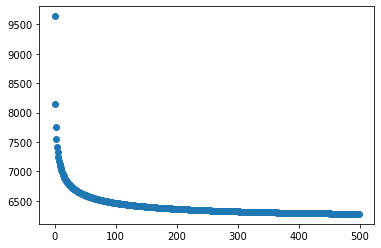

In [307]:
plt.scatter(iter_,loss)

In [278]:
#proof that the coefficients are forced to zero

p_ls = []
beta_mag_ls = []

for p in range(1,2000,100):
    
    
    l,s,beta = JPRidge(X,y,penalty = p)
    beta_mag = beta.T@beta
    beta_mag_ls.append(beta_mag)
    p_ls.append(p)

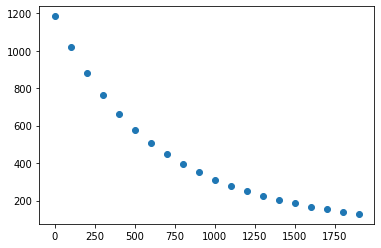

In [279]:
plt.scatter(p_ls,beta_mag_ls)